# Crawling Dataset
Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data/

/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data/"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:22<00:00, 127MB/s]
100% 2.29G/2.29G [00:22<00:00, 108MB/s]


In [ ]:
! unzip Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os
import zipfile


base_dir = '/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data/chest_xray'
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
normal_train_path = train_dir + '/NORMAL'
unormal_train_pat = train_dir + '/PNEUMONIA'
normal_val_path = val_dir + '/NORMAL'
unormal_val_path = val_dir + '/PNEUMONIA'
normal_test_path = test_dir + '/NORMAL'
unormal_test_path = test_dir + '/PNEUMONIA'

normal_len_train = len(os.listdir(normal_train_path))
unormal_len_train = len(os.listdir(unormal_train_pat))
normal_len_val = len(os.listdir(normal_val_path))
unormal_len_val = len(os.listdir(unormal_val_path))
normal_len_test = len(os.listdir(normal_test_path))
unormal_len_test = len(os.listdir(unormal_test_path))

print("jumlah dataset Training : ", normal_len_train + unormal_len_train)
print("jumlah dataset Validasi : ", normal_len_val + unormal_len_val)
print("jumlah dataset Test     : ", normal_len_test + unormal_len_test)
print("jumlah total Dataset    : ", normal_len_train + unormal_len_train + normal_len_val + unormal_len_val + normal_len_test + unormal_len_test)
print("\n\n")
print("jumlah train kelas Normal : ", normal_len_train)
print("jumlah train kelas PNEUMONIA : ", unormal_len_train)
print("jumlah validasi kelas Normal : ", normal_len_val)
print("jumlah validasi kelas PNEUMONIA : ", unormal_len_val)
print("jumlah test kelas Normal : ", normal_len_test)
print("jumlah test kelas PNEUMONIA : ", unormal_len_test)

jumlah dataset Training :  5216
jumlah dataset Validasi :  16
jumlah dataset Test     :  624
jumlah total Dataset    :  5856



jumlah train kelas Normal :  1341
jumlah train kelas PNEUMONIA :  3875
jumlah validasi kelas Normal :  8
jumlah validasi kelas PNEUMONIA :  8
jumlah test kelas Normal :  234
jumlah test kelas PNEUMONIA :  390


# Augmentasi Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=60,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='reflect')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


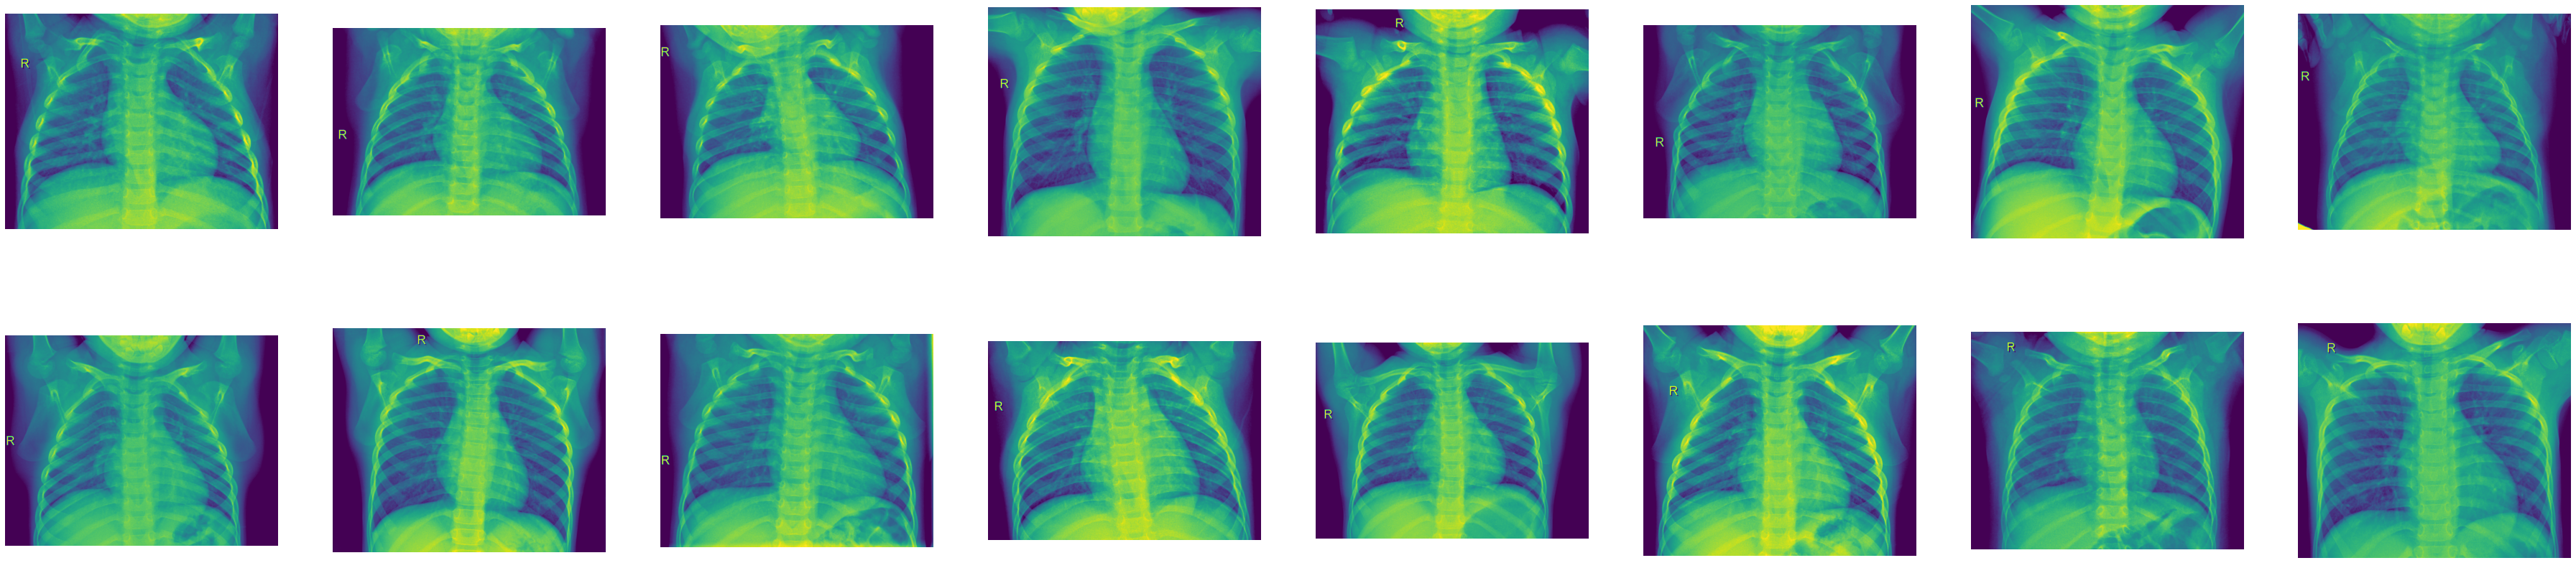

In [ ]:
augmentasi_dir = "/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data/chest_xray/train/NORMAL"
augmentasi_fname = os.listdir(augmentasi_dir)

nrows = 8
ncols = 8

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 8, nrows * 8)

pic_index += 16
next_augmentasi_pix = [os.path.join(augmentasi_dir, fname) 
                for fname in augmentasi_fname[pic_index-16:pic_index]]

for i, img_path in enumerate(next_augmentasi_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

# Arsitektur Model


In [ ]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Hasil Densenet.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='accuracy', verbose = 1, save_best_only = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# import pretrain model in this case i use Resnet Model and setting the parameter "include_top" to false so i can change it
DenseNet_base = tf.keras.applications.densenet.DenseNet169(include_top=False, weights='imagenet',
                                                           input_tensor=None, input_shape=(224, 224,3))

In [ ]:
'''
melakukan setting bahwa model pretrained tidak akan dilatih ulang
'''

DenseNet_base.trainable = False

In [ ]:
print('Adding new layers')
output = DenseNet_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
DenseNet_model = Model(DenseNet_base.input, output)


DenseNet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_6[0][0]']       
                                )                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input

DenseNet_model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='binary_crossentropy', 
                        metrics =['accuracy'])

In [ ]:
history = DenseNet_model.fit_generator(
      train_generator,
      steps_per_epoch=260,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=1,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
260/260 [==============================] - ETA: 0s - loss: 0.7068 - accuracy: 0.6711
Epoch 1: accuracy improved from -inf to 0.67109, saving model to /content/drive/MyDrive/Semester 6/Data Mining/Tubes/Hasil Densenet.h5
260/260 [==============================] - 165s 484ms/step - loss: 0.7068 - accuracy: 0.6711 - val_loss: 0.4190 - val_accuracy: 0.7500
Epoch 2/100
260/260 [==============================] - ETA: 0s - loss: 0.5241 - accuracy: 0.7771
Epoch 2: accuracy improved from 0.67109 to 0.77714, saving model to /content/drive/MyDrive/Semester 6/Data Mining/Tubes/Hasil Densenet.h5
260/260 [==============================] - 124s 474ms/step - loss: 0.5241 - accuracy: 0.7771 - val_loss: 0.3464 - val_accuracy: 0.8750
Epoch 3/100
260/260 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.8197
Epoch 3: accuracy improved from 0.77714 to 0.81967, saving model to /content/drive/MyDrive/Semester 6/Data Mining/Tubes/Hasil Densenet.h5
260/260 [===================

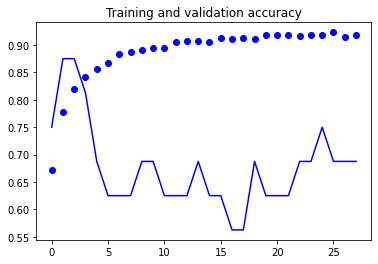

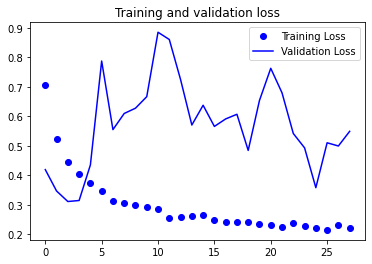

In [ ]:
import matplotlib.pyplot as plt   
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Hasil Densenet.h5'
model = load_model(model_path)

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.907051282051282
Precision : 0.9069180187101731
f1Score : 0.906340329968426
[[197  37]
 [ 21 369]]


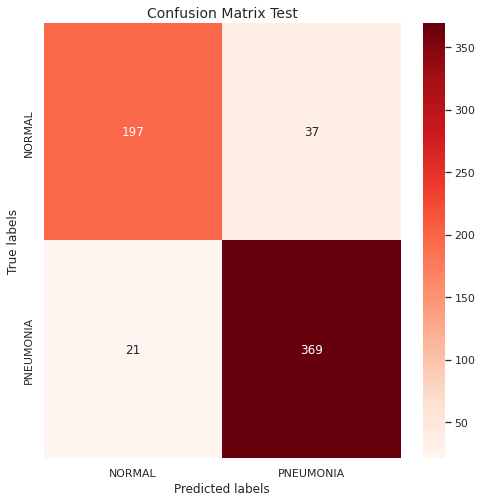

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=224; width=224
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/Semester 6/Data Mining/Tubes/Data/chest_xray/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

      NORMAL       0.90      0.84      0.87       234
   PNEUMONIA       0.91      0.95      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



Text(0.5, 1.0, 'Training and validation loss')

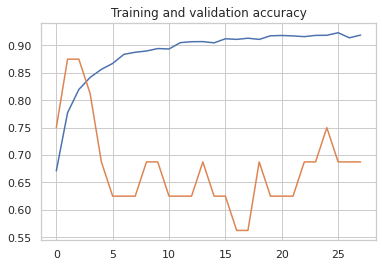

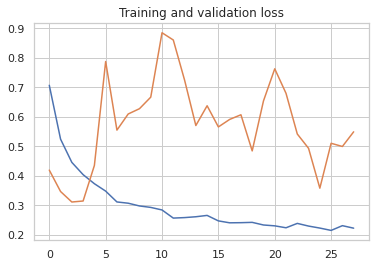

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )